In [81]:
import pandas as pd
import numpy as np
import matplotlib as plt 
import matplotlib.pyplot as plt 
import seaborn as sns

In [82]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [83]:
#Checking for null values
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [85]:
df['date']

0        20141013T000000
1        20141209T000000
2        20150225T000000
3        20141209T000000
4        20150218T000000
              ...       
21608    20140521T000000
21609    20150223T000000
21610    20140623T000000
21611    20150116T000000
21612    20141015T000000
Name: date, Length: 21613, dtype: object

In [86]:
#Convert date to int 
df['date'] = df['date'].apply(lambda x: str(x)[:4])
df['date'] = df['date'].astype(int)
df['date'].dtype

dtype('int32')

In [87]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [88]:
#create the column 'House Age'
df['House_Age'] = df['date'] - df['yr_built']
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,House_Age
0,7129300520,2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,59
1,6414100192,2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,63
2,5631500400,2015,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,82
3,2487200875,2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,49
4,1954400510,2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,28


In [89]:
#Drop id column 
df.drop(['id'], axis=1, inplace=True)

df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,House_Age
0,2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,59
1,2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,63
2,2015,180000.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,82
3,2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,49
4,2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,28


In [90]:
features = [feature for feature in df.columns]

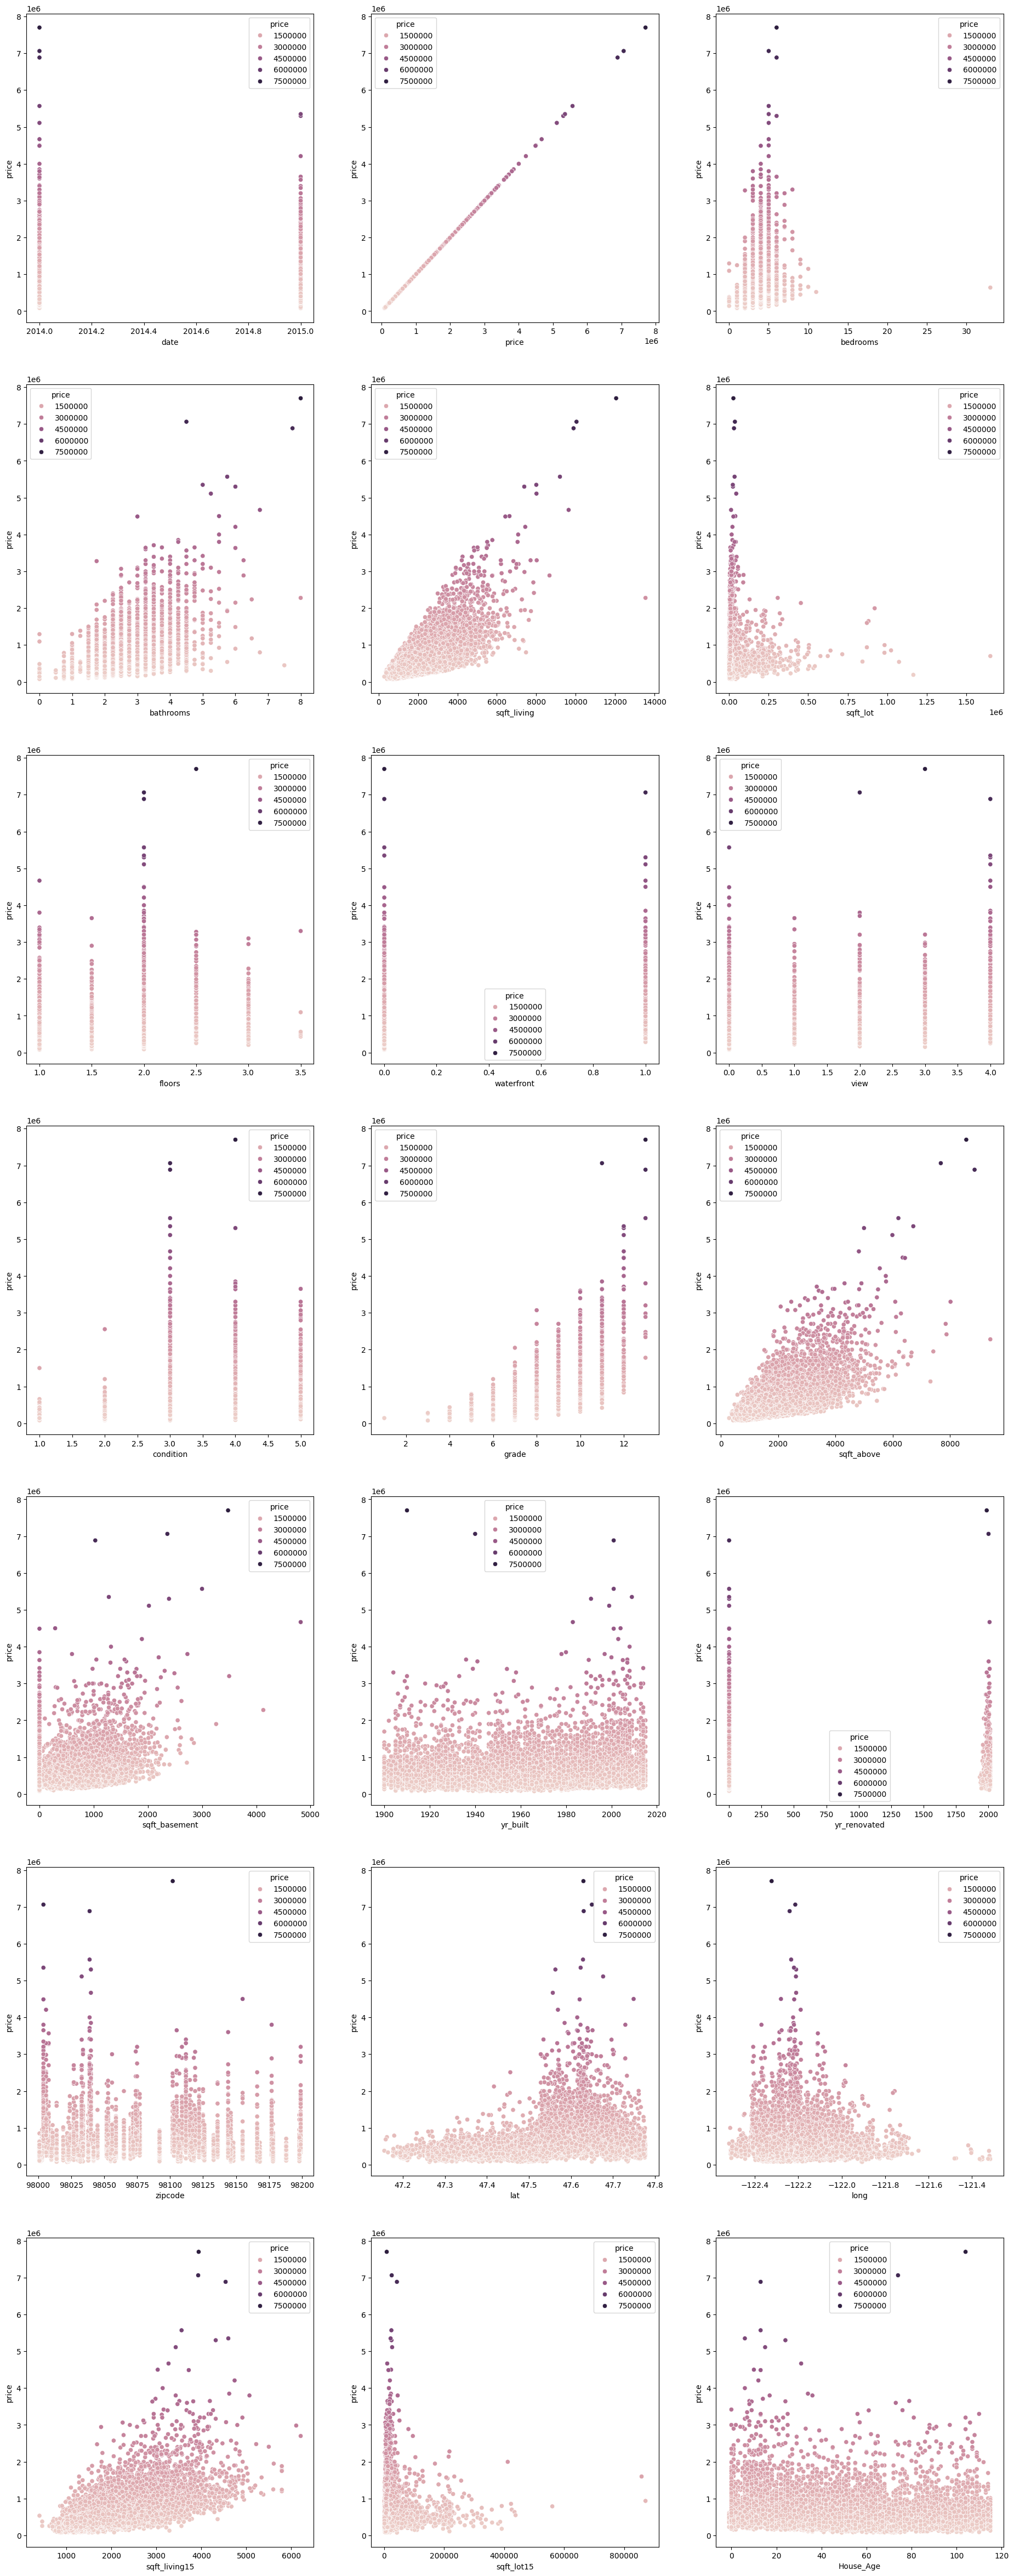

In [91]:
#First EDA
fig, ax = plt.subplots(7, 3, figsize=(23, 60))
for var, subplot in zip(features, ax.flatten()):
    sns.scatterplot(x=var, y='price',  data=df, ax=subplot, hue = 'price' )

Las principales variables que definen el precio son las del tama;o, pero tambien notamos relaciones entre el grado y el precio

<Axes: xlabel='grade', ylabel='price'>

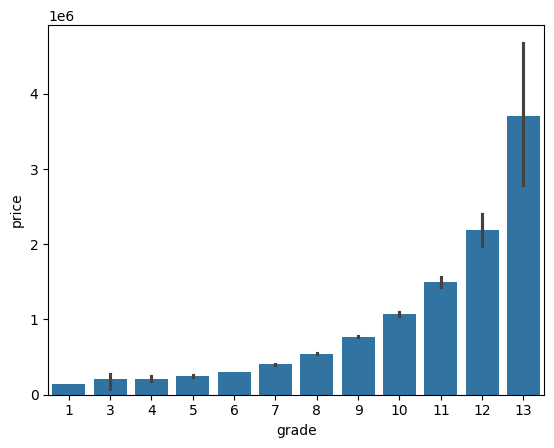

In [92]:
sns.barplot(data=df, x='grade', y='price')

<Axes: xlabel='condition', ylabel='price'>

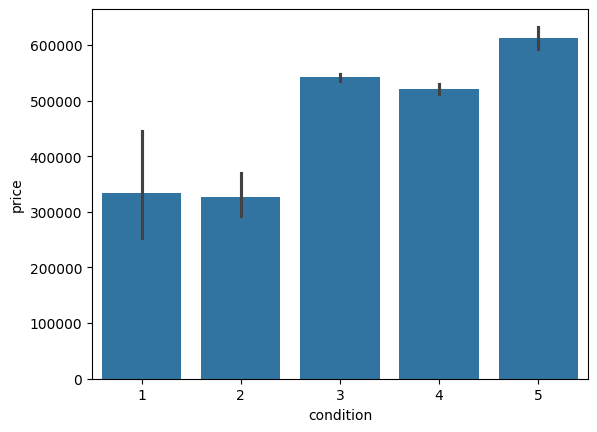

In [93]:
sns.barplot(data=df, x='condition', y='price')

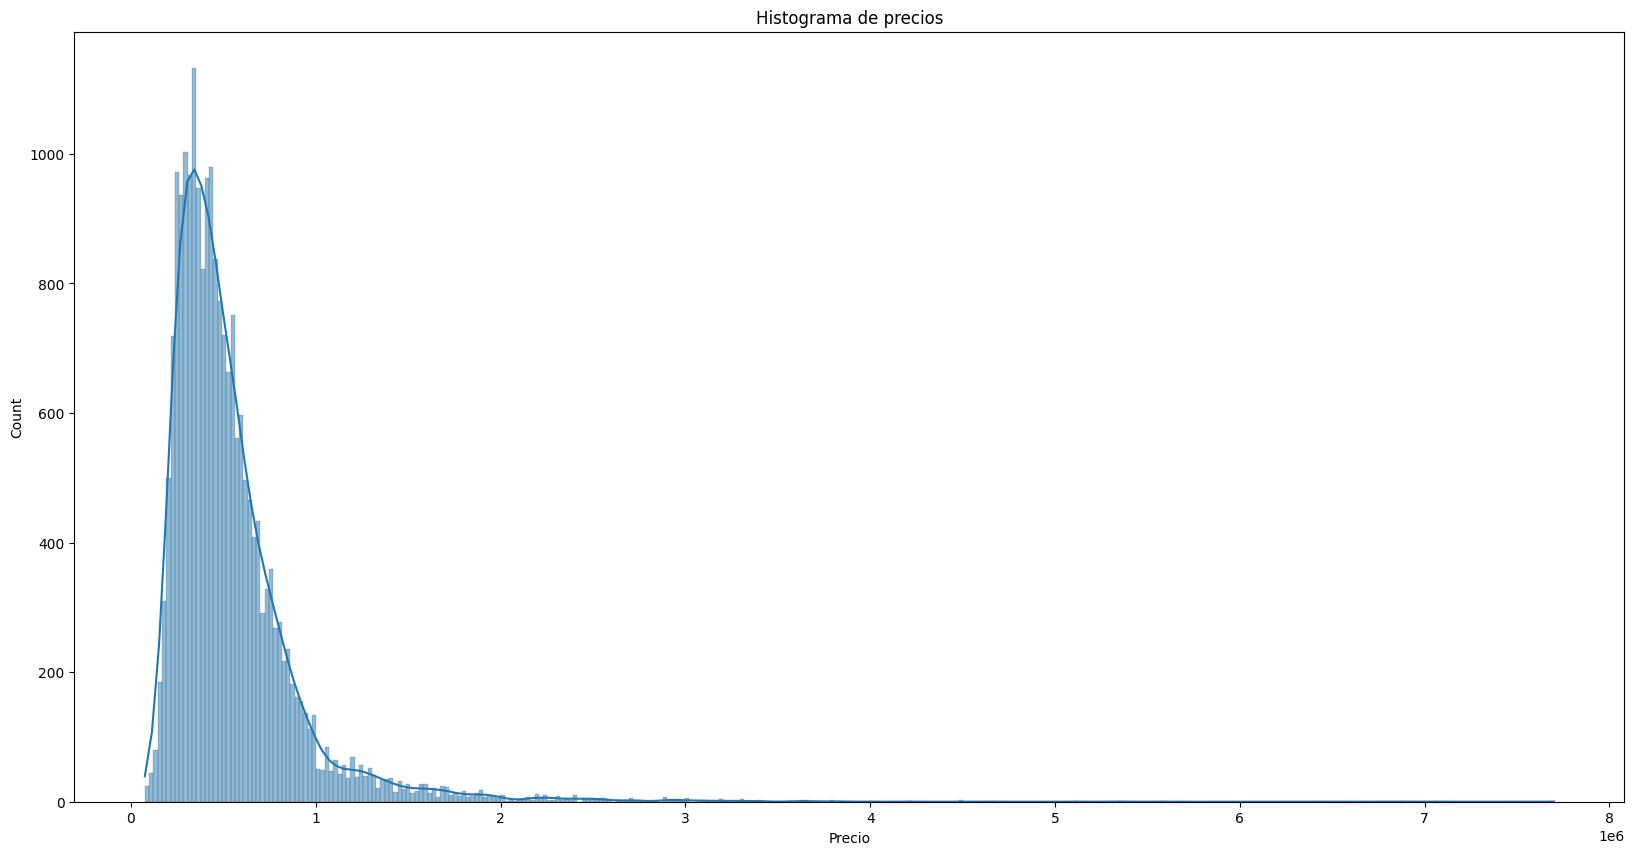

In [94]:
#Check price distribution
ax = sns.histplot(data=df, x='price', kde=True)#definir el histograma
ax.figure.set_size_inches(20, 10)#Tamano
ax.set_title('Histograma de precios')
ax.set_xlabel('Precio');

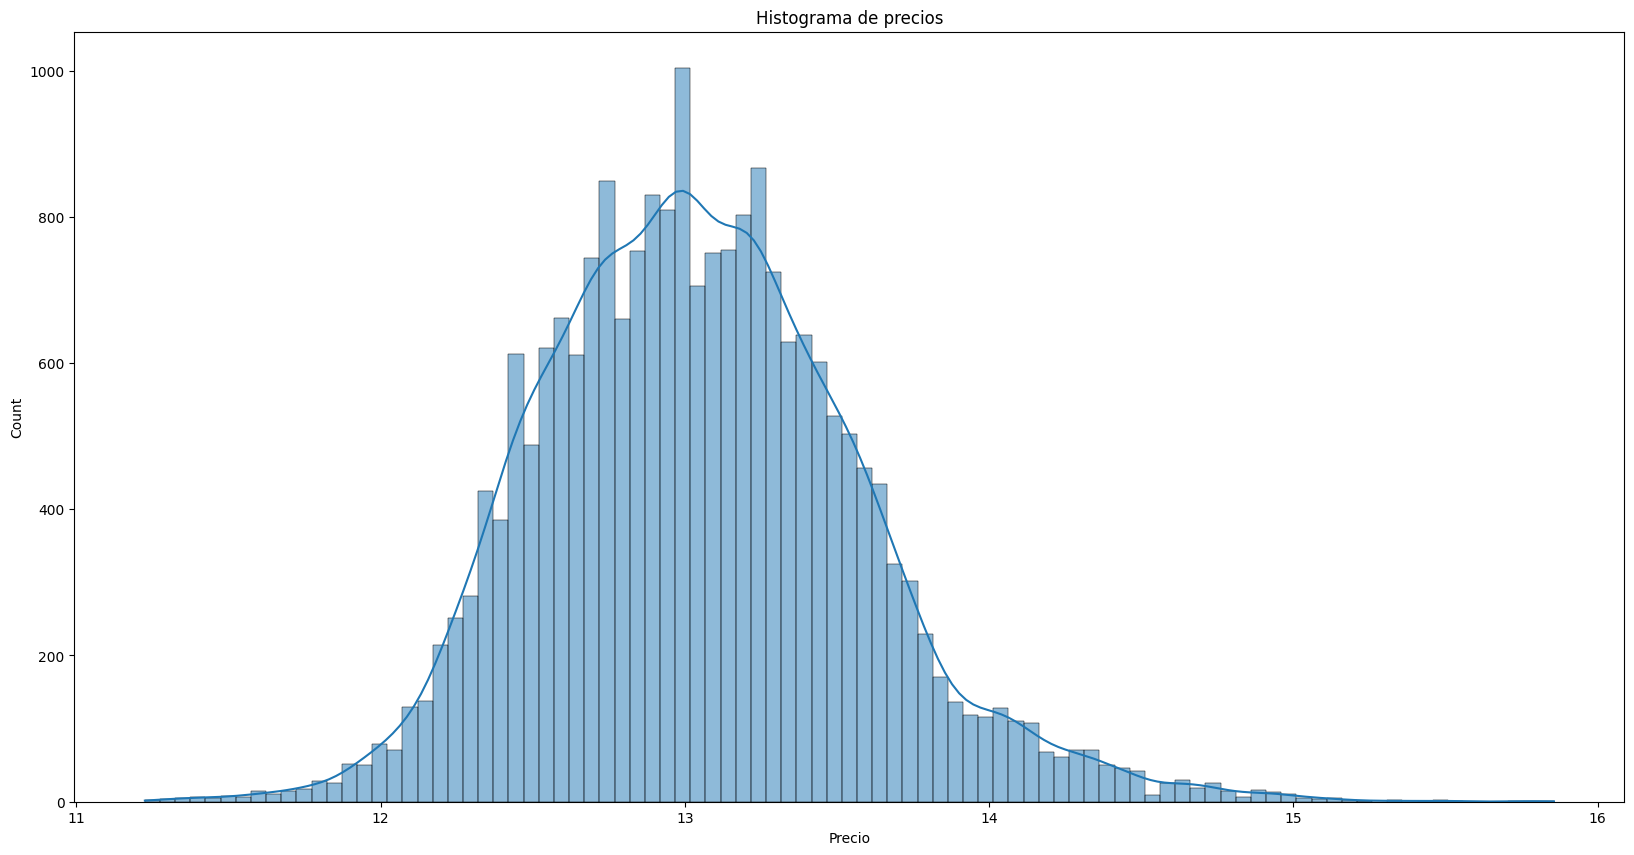

In [95]:
#Convert distribution to log scale
df['price'] = np.log1p(df['price'])
ax = sns.histplot(data=df, x='price', kde=True)
ax.figure.set_size_inches(20, 10)
ax.set_title('Histograma de precios')
ax.set_xlabel('Precio');

In [96]:
#seteamos esto para que nos devuelva numeros decimales
correlacion = df.corr(method='pearson')
correlacion = correlacion.round(2)
correlacion 

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,House_Age
date,1.00,0.00,-0.01,-0.03,-0.03,0.01,-0.02,-0.00,0.00,-0.05,...,-0.02,-0.02,0.00,-0.02,0.00,-0.03,0.00,-0.02,-0.00,0.01
price,0.00,1.00,0.34,0.55,0.70,0.10,0.31,0.17,0.35,0.04,...,0.60,0.32,0.08,0.11,-0.04,0.45,0.05,0.62,0.09,-0.08
bedrooms,-0.01,0.34,1.00,0.52,0.58,0.03,0.18,-0.01,0.08,0.03,...,0.48,0.30,0.15,0.02,-0.15,-0.01,0.13,0.39,0.03,-0.15
bathrooms,-0.03,0.55,0.52,1.00,0.75,0.09,0.50,0.06,0.19,-0.12,...,0.69,0.28,0.51,0.05,-0.20,0.02,0.22,0.57,0.09,-0.51
sqft_living,-0.03,0.70,0.58,0.75,1.00,0.17,0.35,0.10,0.28,-0.06,...,0.88,0.44,0.32,0.06,-0.20,0.05,0.24,0.76,0.18,-0.32
sqft_lot,0.01,0.10,0.03,0.09,0.17,1.00,-0.01,0.02,0.07,-0.01,...,0.18,0.02,0.05,0.01,-0.13,-0.09,0.23,0.14,0.72,-0.05
floors,-0.02,0.31,0.18,0.50,0.35,-0.01,1.00,0.02,0.03,-0.26,...,0.52,-0.25,0.49,0.01,-0.06,0.05,0.13,0.28,-0.01,-0.49
waterfront,-0.00,0.17,-0.01,0.06,0.10,0.02,0.02,1.00,0.40,0.02,...,0.07,0.08,-0.03,0.09,0.03,-0.01,-0.04,0.09,0.03,0.03
view,0.00,0.35,0.08,0.19,0.28,0.07,0.03,0.40,1.00,0.05,...,0.17,0.28,-0.05,0.10,0.08,0.01,-0.08,0.28,0.07,0.05
condition,-0.05,0.04,0.03,-0.12,-0.06,-0.01,-0.26,0.02,0.05,1.00,...,-0.16,0.17,-0.36,-0.06,0.00,-0.01,-0.11,-0.09,-0.00,0.36


<Axes: >

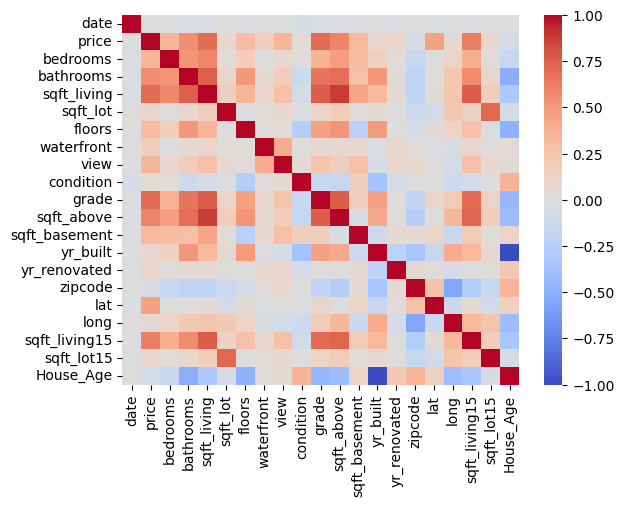

In [97]:
sns.heatmap(correlacion, annot=False, cmap='coolwarm')

In [98]:
#Preprocessing
from sklearn.preprocessing import TargetEncoder

In [99]:
df['zipcode']

0        98178
1        98125
2        98028
3        98136
4        98074
         ...  
21608    98103
21609    98146
21610    98144
21611    98027
21612    98144
Name: zipcode, Length: 21613, dtype: int64

In [100]:
te = TargetEncoder()

df['zipcode'] = te.fit_transform(df[['zipcode']], df['price'])
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,House_Age
0,2014,12.309987,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,12.571287,47.5112,-122.257,1340,5650,59
1,2014,13.195616,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,13.005376,47.7210,-122.319,1690,7639,63
2,2015,12.100718,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,13.002083,47.7379,-122.233,2720,8062,82
3,2014,13.311331,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,13.159141,47.5208,-122.393,1360,5000,49
4,2015,13.142168,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,13.381792,47.6168,-122.045,1800,7503,28


In [101]:
#Were going drop columns with low correlation

df.drop(columns=['date', 'House_Age'], inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,12.309987,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,12.571287,47.5112,-122.257,1340,5650
1,13.195616,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,13.005376,47.7210,-122.319,1690,7639
2,12.100718,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,13.002083,47.7379,-122.233,2720,8062
3,13.311331,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,13.159141,47.5208,-122.393,1360,5000
4,13.142168,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,13.381792,47.6168,-122.045,1800,7503


### Regresion

In [102]:
#Definir los parametros

X = df.drop(columns='price')

y = df['price']

#### Creacion del modelo de regresion lineal

In [103]:
from sklearn.linear_model import LinearRegression #Regresion lineal simple
from sklearn.model_selection import train_test_split #Dividir los datos para entrenar y testear
from sklearn.metrics import r2_score # Obtener el desempeño del modelo

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #Segmentacion de los datos 

In [105]:
regresion = LinearRegression() #Inicializar el modelo

In [106]:
regresion.fit(X_train, y_train) #Datos de entrenamiento

LinearRegression()

In [107]:
#Prueba
prediccion = regresion.predict(X_test)#Pasamos los datos restantes para testear

prediccion #Obtenemos el resultado de la prediccion

array([12.83484429, 13.49615786, 14.13428865, ..., 12.68567388,
       13.57774303, 12.96267089])

In [108]:
r2_regresion = r2_score(y_test, prediccion)#Ponemos los verdaderos datos y los datos resultantes de la prediccion
r2_regresion #Metrica de desempeño

0.8571278162813227

### Arbol de decision para regresion

In [112]:
from sklearn.ensemble import RandomForestRegressor #Modelo de arbol de decision
from sklearn.model_selection import cross_val_score, KFold #Validacion cruzada
from sklearn.model_selection import RandomizedSearchCV
cv = KFold(n_splits=7, shuffle=True) #n_splits = numero de particiones de los subconjuntos

In [113]:
rf = RandomForestRegressor()

In [114]:
param_random_rf = {
    'n_estimators': [150, 250],#numero de arboles
    'max_depth': [20, 30],#profundidad del arbol
    'min_samples_leaf': [3, 5],#minimo de hojas o resultados finales
    'min_samples_split': [6, 8, 10],#minimo de divisiones
}

In [115]:
randomcv_rf = RandomizedSearchCV(
    rf,#Modelo a mejorar 
    param_random_rf,#Parametros
    n_iter=5, #Numero de iteraciones
    cv=cv, 
    scoring='r2',
    n_jobs=2, #Numero de trabajos en simultaneo para evaluar
)

In [116]:
randomcv_rf.fit(X_train, y_train) #Busqueda de los parametros optimos

RandomizedSearchCV(cv=KFold(n_splits=7, random_state=None, shuffle=True),
                   estimator=RandomForestRegressor(), n_iter=5, n_jobs=2,
                   param_distributions={'max_depth': [20, 30],
                                        'min_samples_leaf': [3, 5],
                                        'min_samples_split': [6, 8, 10],
                                        'n_estimators': [150, 250]},
                   scoring='r2')

In [117]:
print(randomcv_rf.best_params_)

{'n_estimators': 150, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_depth': 30}


In [118]:
rf_op = RandomForestRegressor(
    n_estimators= 150, 
    min_samples_split= 6, 
    min_samples_leaf= 3, 
    max_depth= 30
)

In [119]:
rf_op.fit(X_train, y_train)

RandomForestRegressor(max_depth=30, min_samples_leaf=3, min_samples_split=6,
                      n_estimators=150)

In [120]:
prediccion_rf_op = rf_op.predict(X_test)

r2_score(y_test, prediccion_rf_op)

0.8877124525159987